Importando as Libs Necessárias

In [1]:
#importando libs de modelagem e matrizes
import pandas as pd
import numpy as np

In [2]:
#Importando Libs para análises Gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [3]:
#importando Lib para ignorar avisos
import warnings
warnings.filterwarnings('ignore')

In [4]:
#importando o Data Frame
df =  pd.read_excel('Vase_004 - Magalu - Sem Resolução.xlsx')
df.head()

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
0,2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740
1,2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058
2,2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999
3,2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217
4,2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723


In [5]:
#conhecendo um pouco mais sobre o df
df.shape

(247, 7)

In [6]:
df.describe()

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
count,247,247.000000,247.000000,247.000000,247.000000,2.470000e+02,247.000000
mean,2021-07-02 21:28:25.263158016,18.977530,18.205668,18.629717,18.549555,4.536056e+07,18.541389
min,2021-01-04 00:00:00,6.200000,5.620000,5.710000,5.740000,8.716100e+06,5.740000
25%,2021-04-05 12:00:00,15.010000,14.275000,14.705000,14.555000,2.285200e+07,14.555000
50%,2021-07-02 00:00:00,20.650000,19.930000,20.280001,20.270000,3.130900e+07,20.255312
75%,2021-09-29 12:00:00,22.595000,21.985001,22.375000,22.200001,4.742785e+07,22.183912
max,2021-12-30 00:00:00,27.070000,25.900000,26.250000,26.240000,2.578313e+08,26.220984
std,NaN,5.632712,5.567061,5.602659,5.637050,4.082594e+07,5.631316


In [7]:
#checando se a variável 'Data' já está no formato date time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        247 non-null    datetime64[ns]
 1   Maior       247 non-null    float64       
 2   Menor       247 non-null    float64       
 3   Abertura    247 non-null    float64       
 4   Fechamento  247 non-null    float64       
 5   Volume      247 non-null    int64         
 6   Adj Close   247 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.6 KB


In [8]:
#transformando a coluna "Data" em índex
df2 = df.set_index('Data')
df2.head()

,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
Data,,,,,,
2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740
2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058
2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999
2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217
2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723


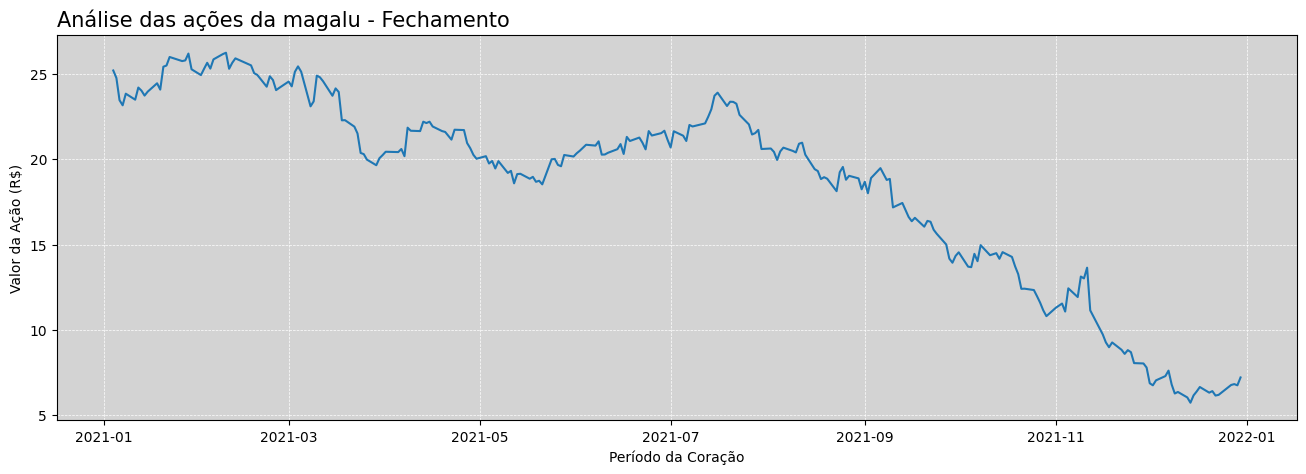

In [9]:
#Vizualização do valor da Ação em decorrer do Tempo
plt.figure( figsize=(16, 5) )
plt.title('Análise das ações da magalu - Fechamento', fontsize=15, loc='left')
plt.plot( df2.index, df2['Fechamento'] )
plt.gca().set_facecolor('lightgray')
plt.grid(True, linestyle='--', linewidth=0.5, color='white')

plt.xlabel('Período da Coração')
plt.ylabel('Valor da Ação (R$)');


In [10]:
df2.tail()

,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
Data,,,,,,
2021-12-23,6.34,5.99,6.22,6.20,97106100,6.20
2021-12-27,6.78,6.23,6.23,6.78,124279800,6.78
2021-12-28,6.96,6.64,6.79,6.83,165573900,6.83
2021-12-29,6.90,6.70,6.84,6.76,79247400,6.76
2021-12-30,7.41,6.77,6.80,7.22,180329400,7.22


Text(0, 0.5, 'Valor da Ação (R$)')

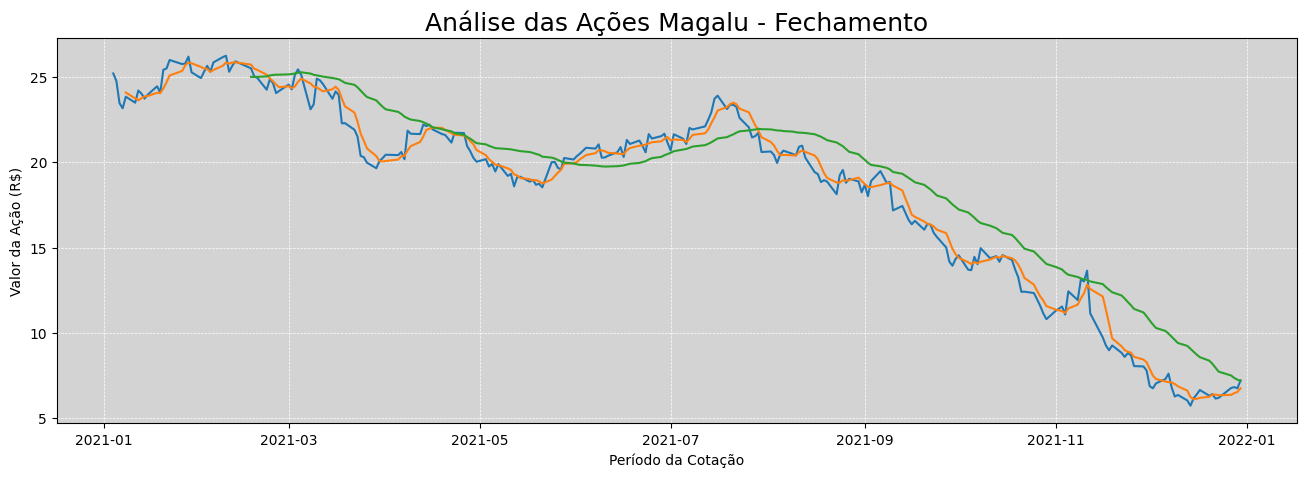

In [11]:
#Média móvel para Reduzir um pouco as Oscilações
Media_Movel = df2['Fechamento'].rolling(5).mean()
Media_Tendencia = df2['Fechamento'].rolling(30).mean()

plt.figure(figsize=(16,5))
plt.title('Análise das Ações Magalu - Fechamento', fontsize = 18)
plt.gca().set_facecolor('lightgray')
plt.grid(True, linestyle='--', linewidth=0.5, color='white')


plt.plot(df2.index,df2['Fechamento'])
plt.plot(df2.index,Media_Movel)
plt.plot(df2.index,Media_Tendencia)

plt.xlabel('Período da Cotação')
plt.ylabel('Valor da Ação (R$)')


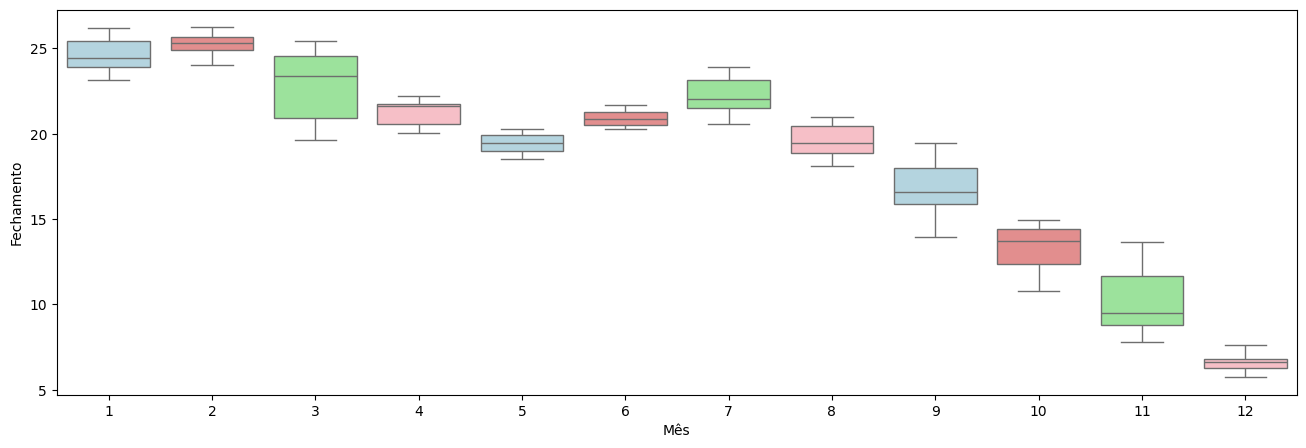

In [15]:
# Boxplot Mensal 

df['Mês'] = df['Data'].dt.month
cores = ['lightblue', 'lightcoral', 'lightgreen', 'lightpink']

plt.figure( figsize=(16, 5) )
sns.boxplot( data=df, x='Mês', y='Fechamento', palette=cores );

In [16]:
#Análisando os valores Agrupados por Meses
df.groupby(['Mês']).describe()['Fechamento']

,count,mean,min,25%,50%,75%,max,std
Mês,,,,,,,,
1,19.0,24.644737,23.160000,23.900000,24.450001,25.455000,26.190001,0.960280
2,18.0,25.208889,24.049999,24.877501,25.299999,25.650000,26.240000,0.656021
3,23.0,22.855217,19.650000,20.940001,23.389999,24.559999,25.440001,1.976698
4,20.0,21.249000,20.030001,20.560000,21.625000,21.760000,22.200001,0.735297
5,21.0,19.430476,18.530001,18.969999,19.459999,19.900000,20.250000,0.564973
6,21.0,20.898095,20.270000,20.500000,20.889999,21.270000,21.670000,0.463116
7,21.0,22.232857,20.600000,21.530001,22.040001,23.120001,23.900000,0.977574
8,22.0,19.656818,18.129999,18.897500,19.485000,20.452499,20.969999,0.885827
9,21.0,16.746191,13.940000,15.870000,16.570000,18.010000,19.480000,1.628581


In [18]:
#Fornecendo um Gráfico Interativo para melhor detalhação
#(Abrir em alguma IDE para vizualização)
Go_Interativo= go.Figure(
    data=[
          go.Candlestick(
              x= df2.index,
              open = df2['Abertura'],
              high = df2['Maior'],
              low = df2['Menor'],
              close = df2['Fechamento'],
          )
    ]
)

Go_Interativo.update_layout( xaxis_rangeslider_visible=False )
Go_Interativo